<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/BigQuery_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configure BigQuery for Public Data in Colab

## 1. Initialize the client


*   Authenticate
*   Change your **project_id** to the one that is in your [big query account](https://https://console.cloud.google.com/welcome/new)
*   Change your dataset to the one you are wanting to fetch from.
    Make sure to Include `'bigquery-public-data.'` before the dataset id.




In [21]:
import pandas as pd
from google.cloud import bigquery
from google.colab import auth

# Authenticate (this step is correct for Google Colab)
auth.authenticate_user()

# Specify your Google Cloud Project ID
project_id = 'cryptic-idiom-414323'

# Create a BigQuery client with the specified project
client = bigquery.Client(project=project_id)

# Ensure you're using the correct dataset for your query
dataset_id = 'bigquery-public-data.google_political_ads'


## 2. create query

I like to have mine in it's code block to minimize the risk of running it.

Make sure to append the dataset with your table using .table_name


In [27]:
# query with assumed correct table
query = f"""
SELECT advertiser_id
FROM `{dataset_id}.advertiser_stats`
"""

OR enter then entire table name as it is listed in big query


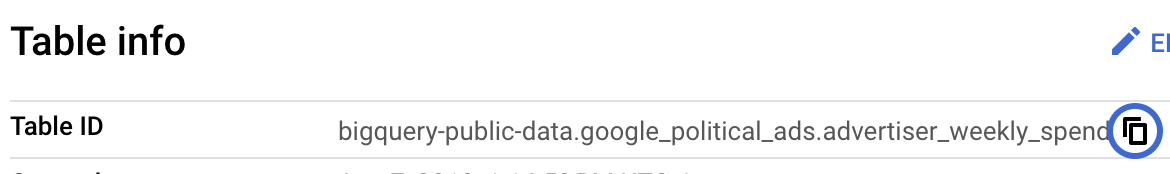

In [ ]:
# query with assumed correct table
query = f"""
SELECT advertiser_id
FROM `bigquery-public-data.google_political_ads.advertiser_stats`
"""

## 3. Dry Run

assess the cost before running

In [26]:
# Estimate query cost
BIGQUERY_COST_PER_GB = 5 / (1024 ** 3)  # Check for the latest cost per GB
dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_job = client.query(query, job_config=dry_run_config)
estimated_bytes = dry_run_job.total_bytes_processed

# Print estimated bytes (this step is correct)
print(f"Estimated bytes processed: {estimated_bytes} bytes")

# Correctly convert bytes to gigabytes for cost estimation
estimated_cost = estimated_bytes / (1024 ** 3) * BIGQUERY_COST_PER_GB
print(f"Estimated cost: ${estimated_cost:.2f}")


Estimated bytes processed: 391392 bytes
Estimated cost: $0.00


##4. Run Query

save it to a Dataframe if you like

In [24]:
# Execute the query and directly load the results into a pandas DataFrame
df = client.query(query).to_dataframe()

# Display the DataFrame
print(df)

                advertiser_id
0      AR16856365306598129665
1      AR00905842034751832065
2      AR02887872581753372673
3      AR05166828271060385793
4      AR16562970627409969153
...                       ...
16303  AR11301279001365970945
16304  AR03851053082741833729
16305  AR16271980855029661697
16306  AR14312915017123495937
16307  AR08047707890141626369

[16308 rows x 1 columns]
